# **K Nearest Neighbors**



Iris dataset [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris) \
```k-NN``` documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn.datasets import load_iris # Iris dataset

In [ ]:
iris = load_iris() # Load the iris dataset
iris_x = iris.data[:,0:2] # Features. We'll pick 2
iris_y = iris.target # Labels

# Print shapes
print ( iris_x.shape, iris_y.shape )

(150, 2) (150,)


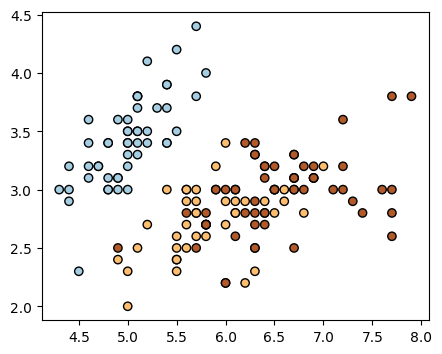

In [ ]:
#realizacion de diagrama de dispersion
_, ax = plt.subplots(figsize=( 5 , 4 )) #(ancho,alto)
ax.scatter( iris_x[:, 0] , iris_x[:, 1] , c = iris_y ,edgecolors='k', cmap = 'Paired')

In [ ]:
# Instance kNN object
n_neighbors = 9 #siempre tiene que ser impar
knn = kNN(n_neighbors = n_neighbors , metric = "euclidean")

# Training
knn.fit( iris_x , iris_y ) # (num_samples, num_features), (num_samples)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

(200, 200) (200, 200) (200, 200)


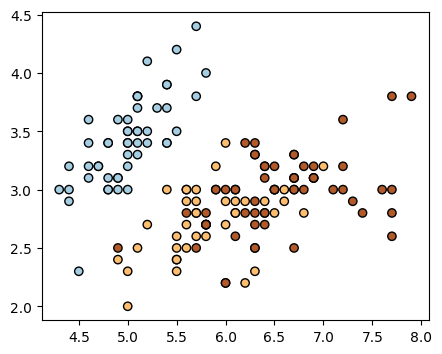

In [ ]:
## Plot decision boundaries de forma manual
#Paso 1 determinar minimo y maximo
h_min,h_max= iris_x[:,0].min()-0.1, iris_x[:,0].max()+0.1
v_min,v_max= iris_x[:,1].min()-0.1, iris_x[:,1].max()+0.1

#Paso 2 Realizar la cuadicula o grid
h_grid,v_grid=np.meshgrid(np.linspace(h_min,h_max,200), np.linspace(v_min,v_max,200))

#Paso 3 calcular predicciones
pred_grid = knn.predict(np.c_[h_grid.ravel(), v_grid.ravel()])

#Paso 4 cambiar el tamaño de las predcciones a la cudricula
pred_grid = pred_grid.reshape(h_grid.shape)
print(h_grid.shape, v_grid.shape, pred_grid.shape)
_

[]

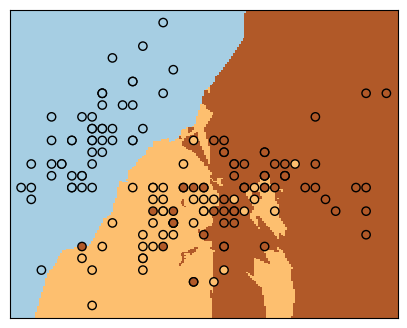

In [ ]:
#Paso 5 se crea la cuadricula o plot
_, ax = plt.subplots(figsize=( 5 , 4 )) #(ancho,alto)
ax.pcolormesh(h_grid,v_grid, pred_grid,cmap='Paired')
ax.scatter( iris_x[:, 0] , iris_x[:, 1] , c = iris_y ,edgecolors='k', cmap = 'Paired')

#esto es para que los ejes queden sin numero
ax.set_xticks([])
ax.set_yticks([])

## Using the Fruits dataset

Download the fruits data [here](https://drive.google.com/file/d/1M8tiAWDZclABJN1Meq9oEHCLJTNyHdpP/view?usp=share_link)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as kNN
import csv

In [4]:
# Cargar el conjunto de datos de frutas
fruit_data = []
with open('/content/fruits_data_ext.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Saltar el encabezado si existe
    for row in reader:
        fruit_data.append(row)

# Convertir a un array de numpy
fruit_data = np.array(fruit_data)

# Usar fruit_name y fruit_subtype como características
fruit_names = fruit_data[:, 0]        # Primera columna es el nombre de la fruta
fruit_subtypes = fruit_data[:, 1]     # Segunda columna es el subtipo de la fruta
labels = fruit_data[:, -1]            # Última columna son las etiquetas

# Codificar las características de texto (fruit_name y fruit_subtype) en valores numéricos
_, fruit_names_encoded = np.unique(fruit_names, return_inverse=True)
_, fruit_subtypes_encoded = np.unique(fruit_subtypes, return_inverse=True)

# Combinar las características codificadas
features = np.column_stack((fruit_names_encoded, fruit_subtypes_encoded))

# Codificar las etiquetas de texto si es necesario
_, fruit_y = np.unique(labels, return_inverse=True)

# Imprimir las dimensiones
print(features.shape, fruit_y.shape)

(177, 2) (177,)


In [5]:
# Instance kNN object
n_neighbors = 9  # Número impar para evitar empates
knn = kNN(n_neighbors=n_neighbors, metric='euclidean')

# Training
knn.fit(features, fruit_y)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

(200, 200) (200, 200) (200, 200)


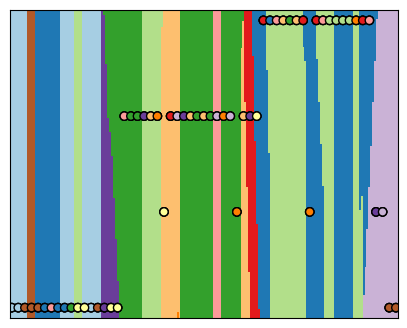

In [6]:
## Plot decision boundaries
_# Paso 1: Determinar mínimo y máximo de las características (nombres y subtipos)
h_min, h_max = features[:, 0].min() - 0.1, features[:, 0].max() + 0.1
v_min, v_max = features[:, 1].min() - 0.1, features[:, 1].max() + 0.1

# Paso 2: Crear la cuadrícula o grid
h_grid, v_grid = np.meshgrid(np.linspace(h_min, h_max, 200), np.linspace(v_min, v_max, 200))

# Paso 3: Calcular predicciones para cada punto de la cuadrícula
pred_grid = knn.predict(np.c_[h_grid.ravel(), v_grid.ravel()])

# Paso 4: Cambiar el tamaño de las predicciones a la cuadrícula
pred_grid = pred_grid.reshape(h_grid.shape)
print(h_grid.shape, v_grid.shape, pred_grid.shape)

# Paso 5: Crear el gráfico
_, ax = plt.subplots(figsize=(5, 4))  # (ancho, alto)
ax.pcolormesh(h_grid, v_grid, pred_grid, cmap='Paired')
ax.scatter(features[:, 0], features[:, 1], c=fruit_y, edgecolors='k', cmap='Paired')

# Remover los números de los ejes
ax.set_xticks([])
ax.set_yticks([])

plt.show()